In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading the Data
df = pd.read_csv(r"C:\Users\amuly\Downloads\Womens Clothing E-Commerce Reviews.csv\Womens Clothing E-Commerce Reviews.csv",index_col =[0])

In [3]:
df.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
# Checking For Missing Values and Handling it
df.isnull().sum()/len(df)*100

Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.shape

(23486, 10)

In [7]:
df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()


Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

In [8]:
df.loc[(df.Rating==5) & (df['Recommended IND']==0)]['Review Text'].iloc[1]  

"This top is one of my retailer faves! it is so comfortable and love the quality and design. i receive many compliments on this top. i usually wear an xs or s in retailer tops and the xs was a little tight in the arms. the dressing room attendant suggested ordering a petite small so i wouldn't lose the shape. so glad i did. it fits perfect! i even ordered when it was on sale!! the gray color is perfect! its not too thick or thin."

In [9]:
# Text Features:
text_df = df[['Title', 'Review Text', 'Recommended IND']]
text_df.head()

,Title,Review Text,Recommended IND
0,NaN,Absolutely wonderful - silky and sexy and comf...,1
1,NaN,Love this dress! it's sooo pretty. i happene...,1
2,Some major design flaws,I had such high hopes for this dress and reall...,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1
4,Flattering shirt,This shirt is very flattering to all due to th...,1


In [11]:
# Dropping null values
text_df['Review Text'].isna().sum()


np.int64(845)

In [13]:
text_df = text_df[~text_df['Review Text'].isna()]
text_df = text_df.rename(columns={"Recommended IND": "Recommended"})
print("My data's shape is:", text_df.shape)
text_df.head()

My data's shape is: (22641, 3)


,Title,Review Text,Recommended
0,NaN,Absolutely wonderful - silky and sexy and comf...,1
1,NaN,Love this dress! it's sooo pretty. i happene...,1
2,Some major design flaws,I had such high hopes for this dress and reall...,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1
4,Flattering shirt,This shirt is very flattering to all due to th...,1


In [16]:
text_df = text_df.drop(columns=['Title'], errors='ignore')
text_df = text_df.rename(columns={"Review Text": "Review"})
text_df.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [17]:
# Target Value - positive\negative review
text_df['Recommended'].unique()

array([1, 0])

In [18]:
text_df['Recommended'].value_counts(normalize=True)

Recommended
1    0.818868
0    0.181132
Name: proportion, dtype: float64

In [ ]:
The target is imbalanced

In [19]:
# Adding Features
# Text Length:
text_df['Review_length'] = text_df['Review'].apply(len)
print(text_df.shape)
text_df.head()

(22641, 3)


,Review,Recommended,Review_length
0,Absolutely wonderful - silky and sexy and comf...,1,53
1,Love this dress! it's sooo pretty. i happene...,1,303
2,I had such high hopes for this dress and reall...,0,500
3,"I love, love, love this jumpsuit. it's fun, fl...",1,124
4,This shirt is very flattering to all due to th...,1,192


In [20]:
text_df['Review_length'].describe()

count    22641.000000
mean       308.687911
std        143.940048
min          9.000000
25%        186.000000
50%        301.000000
75%        459.000000
max        508.000000
Name: Review_length, dtype: float64

In [21]:
# Exclamation mark counter:
def count_exclamation_mark(string_text):
    count = 0
    for char in string_text:
        if char == '!':
            count += 1
    return count


In [22]:
text_df['count_exc'] = text_df['Review'].apply(count_exclamation_mark)
text_df.head(5)

,Review,Recommended,Review_length,count_exc
0,Absolutely wonderful - silky and sexy and comf...,1,53,0
1,Love this dress! it's sooo pretty. i happene...,1,303,1
2,I had such high hopes for this dress and reall...,0,500,1
3,"I love, love, love this jumpsuit. it's fun, fl...",1,124,2
4,This shirt is very flattering to all due to th...,1,192,3


In [23]:
text_df['count_exc'].describe(np.arange(0.2, 1.0, 0.2))

count    22641.000000
mean         0.637604
std          1.138112
min          0.000000
20%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
80%          1.000000
max         41.000000
Name: count_exc, dtype: float64

<Axes: xlabel='count_exc'>

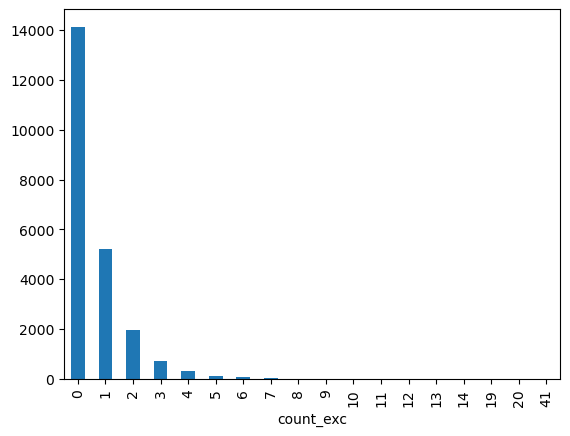

In [24]:
text_df['count_exc'].value_counts().sort_index().plot(kind='bar')

In [25]:
text_df[text_df['count_exc']== 41].index

Index([3301], dtype='int64')

In [26]:
text_df['Review'][3301]

'Love this top, just received it today.\r\nit is a very artistic interpretation for a casual top.\r\nthe blue is gorgeous!\r\nthe unique style of the peplm and the details on the front set this apart!\r\nruns a little shorter, but i feel the length enhances it;s beauty, and is appropriate for the overall design.\r\nlove !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\r\nordered my usual size and it fits perfectly.'

In [27]:
# Text Polarity
# Polarity is the emotion expressed in the sentence. It can be positive, neagtive and neutral.
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore') 
text_df['Polarity'] = text_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
text_df.head(5)

,Review,Recommended,Review_length,count_exc,Polarity
0,Absolutely wonderful - silky and sexy and comf...,1,53,0,0.633333
1,Love this dress! it's sooo pretty. i happene...,1,303,1,0.339583
2,I had such high hopes for this dress and reall...,0,500,1,0.073675
3,"I love, love, love this jumpsuit. it's fun, fl...",1,124,2,0.550000
4,This shirt is very flattering to all due to th...,1,192,3,0.512891


In [67]:
# Reviews with Positive Polarity
sam = text_df.loc[text_df.Polarity == 1,['Review']].sample(3).values
for i in sam:
    print(i[0])

This is a great blouse for all shapes!   you can wear it under a suit or with jeans!
This dress is so versatile. great summer wear!
This is the perfect holiday dress. my best purchase of the season!


In [68]:
# Reviews with Neutral Polarity
sam = text_df.loc[text_df.Polarity == 0.5,['Review']].sample(3).values
for i in sam:
    print(i[0])

I love these pants and wear them all the time. i wish they hadn't been discontinued
Love this top! cloth & stone makes excellent quality clothes that are durable and have unique details. this top can go with many different looks and i can't wait to take it out for a spin!

i bought the medallion crops to go with this top and it is an awesome combo, i would definitely check it out!
I am wearing a medium in the photos and for reference my measurements are 38-30-40. i did not purchase this top.


In [70]:
# Reviews with Negative Polarity
sam =text_df.loc[text_df.Polarity < 0,['Review']].sample(3).values
for i in sam:
    print(i[0])

This is literally the most unflattering thing i have ever tried on from retailer. the sleeves are so weird and ugly. they get really fat at the top, like a dolman sleeve, but it looks really strange because they don?t flow into the rest of the top, which is very structured. it made my shoulders look huge even though i have very narrow shoulders. this is not apparent in the model picture at all. the thick black seams at the shoulders are also placed in a really awkward spot which also contri
Runs large and it also had a small hole in the back had to return it.
I love boiled wool and have gotten a few items from retailer in years past that i have loved. this one was a fail. i typically wear a small and it was slightly too big and shapeless for me. i am 34c, 127#. the moment i put it on, it felt like i was wearing a bathrobe. it flares quite a bit, and the stitching is brown and not dark grey like i was hoping. the quality is as expected. the color overall is as it looks online. but it wa

In [74]:
# Create a sentiment column
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply on Review column
text_df['sentiment'] = text_df['Review'].apply(get_sentiment)


In [75]:
# Count sentiments
positive = (text_df['sentiment'] == 'Positive').sum()
negative = (text_df['sentiment'] == 'Negative').sum()
neutral  = (text_df['sentiment'] == 'Neutral').sum()

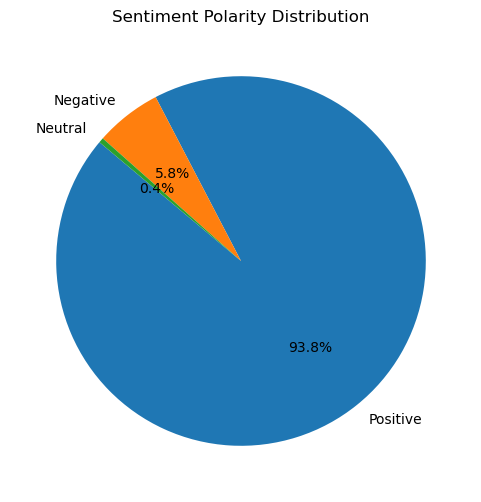

In [80]:
# Plot pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie([positive, negative, neutral],
        labels=['Positive', 'Negative', 'Neutral'],
        autopct='%1.1f%%',
        startangle=140)
plt.title("Sentiment Polarity Distribution")
plt.show()

In [30]:
text_prep = text_df.copy()

In [31]:
#Preprocessing - text features
#Dropping punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
import re
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [33]:
text_prep['Review'] = text_prep['Review'].apply(punctuation_removal)
text_prep['Review'].head()

0    Absolutely wonderful  silky and sexy and comfo...
1    Love this dress  its sooo pretty  i happened t...
2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
Name: Review, dtype: object

In [34]:
from IPython.display import Image
Image(url= "http://josecarilloforum.com/imgs/longnounphrase_schematic-1B.png", width=600, height=10)

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer


In [36]:

def adj_collector(review_string):
    new_string=[]
    review_string = word_tokenize(review_string)
    tup_word = nltk.pos_tag(review_string)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_string.append(tup[0])  
    return ' '.join(new_string)

In [38]:
text_prep['Review'] = text_prep['Review'].apply(adj_collector)
text_prep['Review'].head(7)

0                                wonderful comfortable
1    happened find did have ordered online bought a...
2    had such high wanted ordered small usual found...
3                            love fabulous i get great
4           is flattering due adjustable is perfect is
5    love is petite am tall was is long full overwh...
6    aded last see i went am is gorgeous mathced wa...
Name: Review, dtype: object

In [39]:
# Stopwords:
print(stopwords.words('english')[::12])

['a', 'are', 'both', 'doesn', 'had', "he'll", 'if', 'its', 'mustn', 'off', 're', "should've", 'themselves', 'to', "we'll", 'whom', 'your']


In [40]:
stop = stopwords.words('english')
stop.append("i'm")

In [41]:
# Stopwords punctuation removal

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
print(stop_words[::12])

['a', 'are', 'both', 'doesn', 'had', 'hell', 'if', 'its', 'mustn', 'off', 're', 'shouldve', 'themselves', 'to', 'well', 'whom', 'your']


In [42]:
# Adding clothing stopwords:

clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

In [43]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() not in clothes_list ]


In [44]:
text_prep['Review'] = text_prep['Review'].apply(stopwords_removal)
text_prep['Review'].head()

0                             [wonderful, comfortable]
1    [happened, find, ordered, online, bought, love...
2    [high, wanted, ordered, small, usual, found, s...
3                         [love, fabulous, get, great]
4               [flattering, due, adjustable, perfect]
Name: Review, dtype: object

In [45]:
print(text_prep['Review'][3301])


['received', 'artistic', 'casual', 'gorgeous', 'unique', 'runs', 'little', 'appropriate', 'overall', 'ordered', 'usual']


In [46]:
print(text_prep['Review'][267]) 


['say', 'true', 'short', 'tall', 'came']


In [48]:
# Removing all numbers 
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

In [49]:
text_prep['Review'] = text_prep['Review'].apply(drop_numbers)
text_prep['Review'].head()

0                                wonderful comfortable
1    happened find ordered online bought love littl...
2    high wanted ordered small usual found small sm...
3                              love fabulous get great
4                    flattering due adjustable perfect
Name: Review, dtype: object

In [50]:
print(text_prep['Review'][267]) 


say true short tall came


In [51]:
print(text_prep['Review'][2293])


purchased return expected said lbs got disappointed soft regular looked terrible say tall thin short


In [52]:
# Stemming
porter = PorterStemmer()

In [53]:
text_prep['Review'] = text_prep['Review'].apply(lambda x: x.split())
text_prep['Review'].head()

0                             [wonderful, comfortable]
1    [happened, find, ordered, online, bought, love...
2    [high, wanted, ordered, small, usual, found, s...
3                         [love, fabulous, get, great]
4               [flattering, due, adjustable, perfect]
Name: Review, dtype: object

In [54]:
def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) 
    return text_list_new

In [55]:
text_prep['Review'] = text_prep['Review'].apply(stem_update)
text_prep['Review'].head()

0                                    [wonder, comfort]
1    [happen, find, order, onlin, bought, love, lit...
2    [high, want, order, small, usual, found, small...
3                            [love, fabul, get, great]
4                      [flatter, due, adjust, perfect]
Name: Review, dtype: object

In [56]:
text_prep['Review'] = text_prep['Review'].apply(lambda x: ' '.join(x))
text_prep['Review'].head()

0                                       wonder comfort
1    happen find order onlin bought love littl true...
2    high want order small usual found small small ...
3                                 love fabul get great
4                           flatter due adjust perfect
Name: Review, dtype: object

In [57]:
print(text_prep['Review'][2293])

purchas return expect said lb got disappoint soft regular look terribl say tall thin short


In [59]:
from wordcloud import WordCloud
# WordCloud - Repetition of words
pos_df = text_prep[text_prep.Recommended== 1]
neg_df = text_prep[text_prep.Recommended== 0]
pos_df.head(3)

,Review,Recommended,Review_length,count_exc,Polarity
0,wonder comfort,1,53,0,0.633333
1,happen find order onlin bought love littl true...,1,303,1,0.339583
3,love fabul get great,1,124,2,0.550000


In [60]:
pos_words =[]
neg_words = []

for review in pos_df.Review:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df.Review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]

'high want order small usual found small small reorder ok overal comfort fit tight sever imo major net love petit tall long full overwhelm small shorten narrow take return small order tight pull disappoint go say go style side purchas larg next imposs second cheap tight look describ return sure find love look purchas larg much fell flat return larg med wait excit arriv true made short wide light wi'

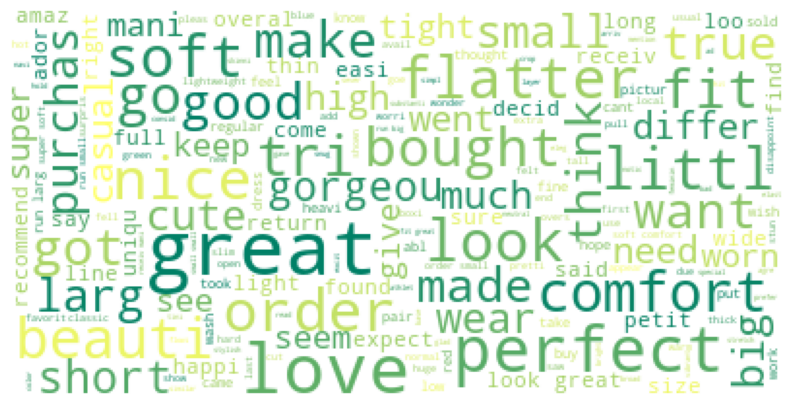

In [62]:
# Positive reviews
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

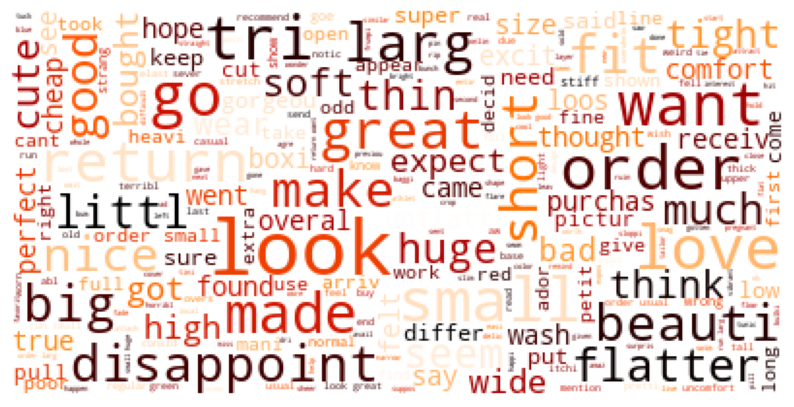

In [63]:
# Negative Reviews:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

<Axes: title={'center': 'Top 20 unigrams in review after removing stop words'}, xlabel='Review'>

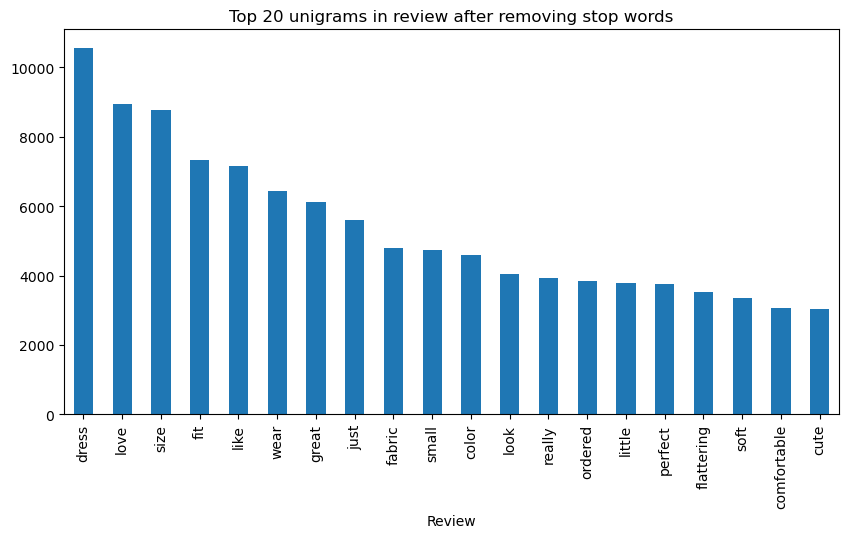

In [84]:
# Visualizing Top 20 Unigrams

common_words = top_n_ngram(text_df['Review'], 20,1)
df = pd.DataFrame(common_words, columns = ['Review' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('Review').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 unigrams in review after removing stop words')

<Axes: title={'center': 'Top 20 unigrams in review after removing stop words'}, xlabel='Review'>

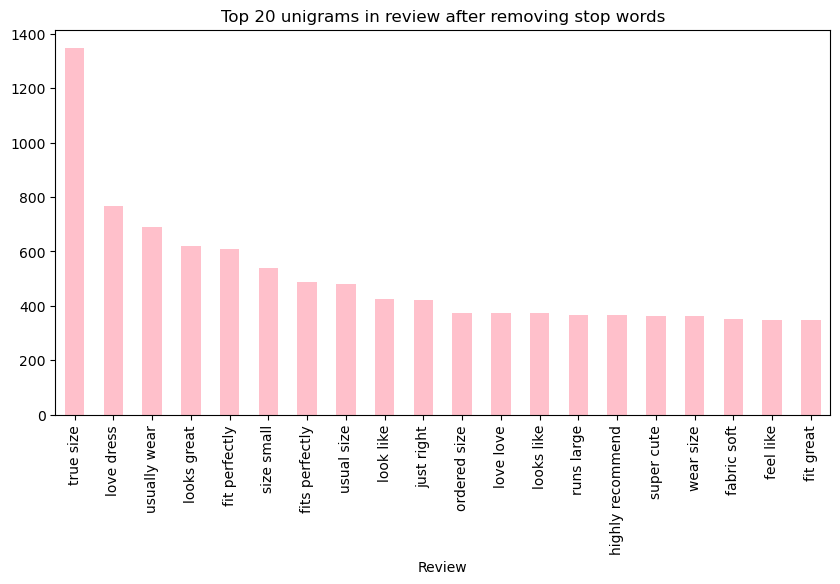

In [87]:
# Visualizing Top 20 Bigrams

common_words = top_n_ngram(text_df['Review'], 20,2)
df = pd.DataFrame(common_words, columns = ['Review' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('Review').sum()['count'].sort_values(ascending=False).plot(color='pink',kind='bar', title='Top 20 unigrams in review after removing stop words')

<Axes: title={'center': 'Top 20 unigrams in review after removing stop words'}, xlabel='Review'>

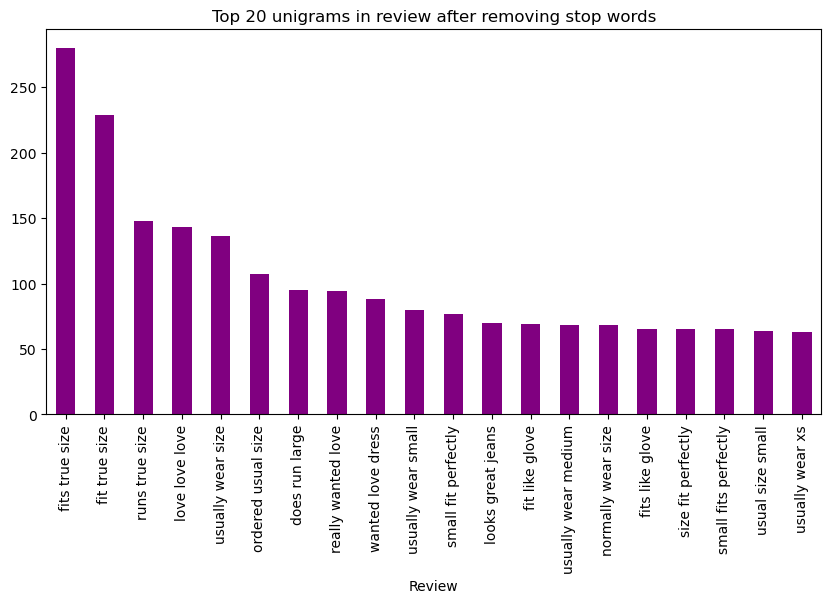

In [88]:
# Visualizing Top 20 Trigrams

common_words = top_n_ngram(text_df['Review'], 20,3)
df = pd.DataFrame(common_words, columns = ['Review' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('Review').sum()['count'].sort_values(ascending=False).plot(color='purple',kind='bar', title='Top 20 unigrams in review after removing stop words')


<Axes: title={'center': 'Top 20 Part-of-speech taggings'}, xlabel='pos'>

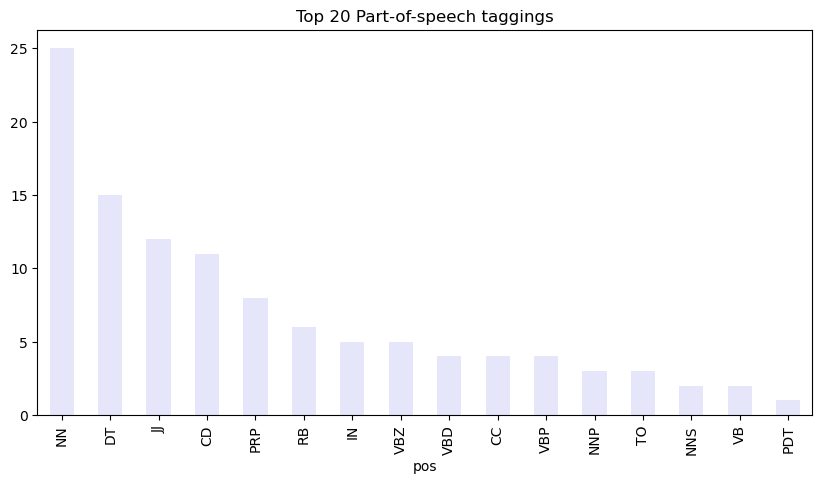

In [96]:
# Visualizing Top 20 Part-of-Speech
blob= TextBlob(str(text_df['Review']))
pos = pd.DataFrame(blob.tags,columns =['word','pos'])
pos1 = pos.pos.value_counts()[:20]
plt.figure(figsize = (10,5))
pos1.plot(color='lavender',kind='bar',title ='Top 20 Part-of-speech taggings')